In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

In [2]:
file_path = r"C:\Users\USER\Downloads\archive (1)\Nigerian E-Commerce Dataset.xlsx"

# Load the dataset
data = pd.read_excel(file_path)

# Display the first few rows
print(data.head())

   Order ID Branch Location                        Branch Name  \
0      4672           Lagos                      Generic Store   
1      4672           Lagos  Multipro Consumer Product Limited   
2      4671           Lagos  Multipro Consumer Product Limited   
3      4670           Lagos                          TDILIFE     
4      4670           Lagos                          TDILIFE     

    Business Name  Is Deleted                   Item ID  \
0  Generic Stores       False  60a7b0242498ec1dd380508c   
1             MUL       False  6076c792a6000742949a819c   
2             MUL       False  6076c792a6000742949a819c   
3       TDILIFE         False  608045d069c51b4e80e70343   
4       TDILIFE         False  608042a469c51b4e80e702f7   

                                  Item Name  Item Price  \
0             Golden Penny Spaghetti - 500g     4950.00   
1             DANO COOLCOW SACHET - 12X380g     3392.75   
2             DANO COOLCOW SACHET - 12X380g     3392.75   
3   HOLLANDI

In [5]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Order ID               0
Branch Location        0
Branch Name            0
Business Name          0
Is Deleted             0
Item ID                0
Item Name              0
Item Price             0
Order Item Number      0
Item Status            0
Packed Quantity        0
Quantity               0
Total Price            0
Order Date             0
Order Region         157
Order Local Area     872
dtype: int64


In [7]:
selected_columns = ['Total Price', 'Quantity']
data = data[selected_columns].dropna()

In [9]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

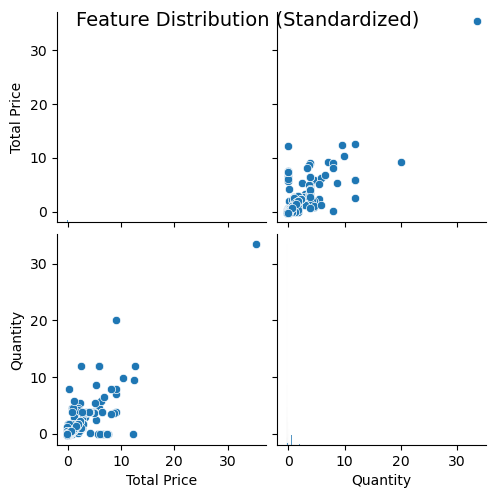

In [11]:
# Visualize the scaled features
sns.pairplot(pd.DataFrame(data_scaled, columns=selected_columns))
plt.suptitle("Feature Distribution (Standardized)", fontsize=14)
plt.show()

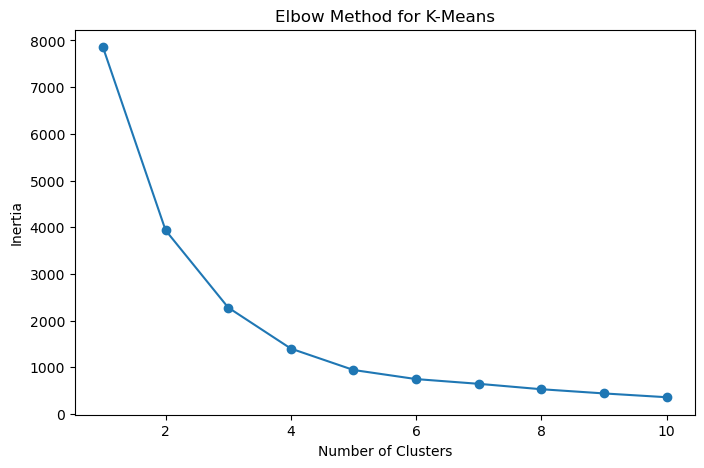

In [13]:
# ------------------ K-Means Clustering ------------------ #
# Determine optimal number of clusters using Elbow Method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot Elbow Method Graph
plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.show()

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data['KMeans_Cluster'] = kmeans.fit_predict(data[['Total Price', 'Quantity']])


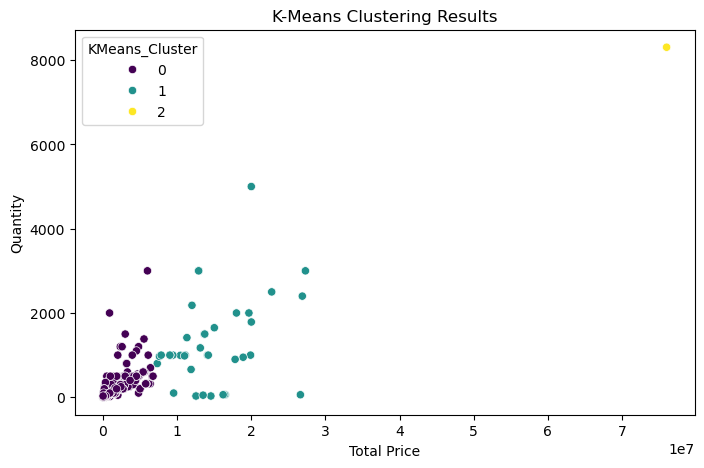

In [17]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['Total Price'], y=data['Quantity'], hue=data['KMeans_Cluster'], palette="viridis")
plt.xlabel("Total Price")
plt.ylabel("Quantity")
plt.title("K-Means Clustering Results")
plt.show()

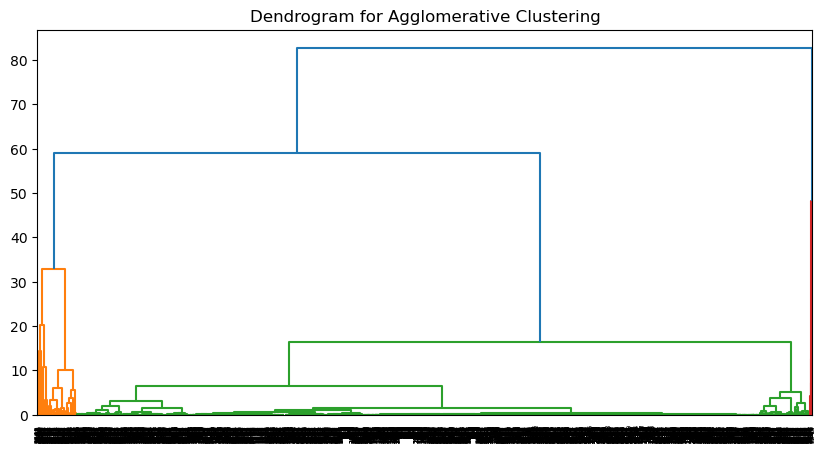

In [22]:
# ------------------ Agglomerative Clustering ------------------ #
# Hierarchical Clustering Dendrogram
plt.figure(figsize=(10,5))
linked = linkage(data_scaled, method='ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram for Agglomerative Clustering")
plt.show()

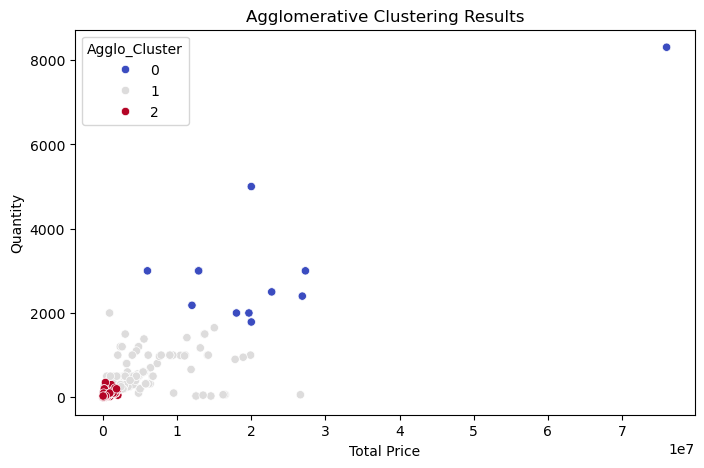

In [24]:
# Apply Agglomerative Clustering (3 clusters)
agglo = AgglomerativeClustering(n_clusters=3)
data['Agglo_Cluster'] = agglo.fit_predict(data_scaled)
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Total Price'], y=data['Quantity'], hue=data['Agglo_Cluster'], palette="coolwarm")
plt.xlabel("Total Price")
plt.ylabel("Quantity")
plt.title("Agglomerative Clustering Results")
plt.show()


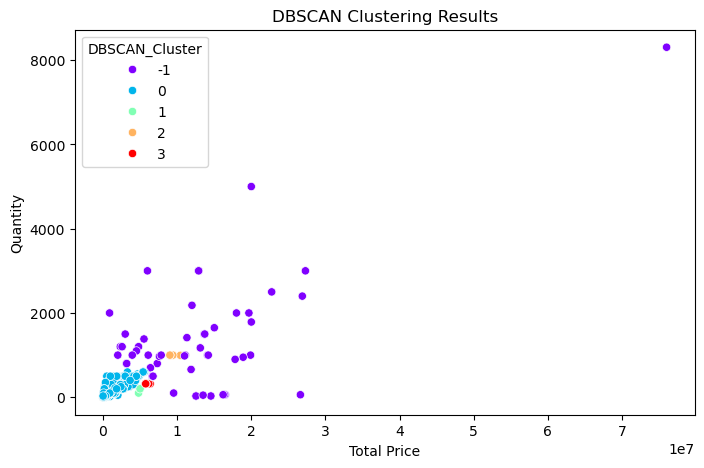

In [29]:
# ------------------ DBSCAN Clustering ------------------ #
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['Total Price'], y=data['Quantity'], hue=data['DBSCAN_Cluster'], palette="rainbow")
plt.xlabel("Total Price")
plt.ylabel("Quantity")
plt.title("DBSCAN Clustering Results")
plt.show()

In [31]:
# ------------------ PCA for Dimensionality Reduction ------------------ #
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]


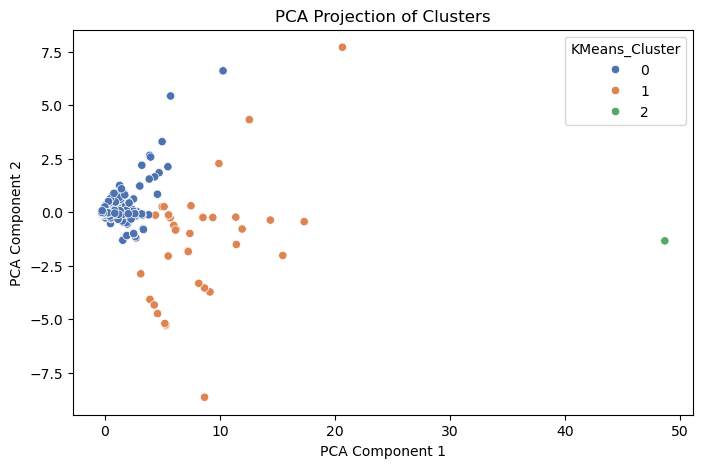


Final Data Sample with Cluster Labels:
    Total Price  Quantity  KMeans_Cluster  Agglo_Cluster  DBSCAN_Cluster  \
0      4950.00         1               0              2               0   
1      6785.50         2               0              2               0   
2      3392.75         1               0              2               0   
3      3370.00         1               0              2               0   
4      4845.00         1               0              2               0   

       PCA1      PCA2  
0 -0.308480 -0.011166  
1 -0.305003 -0.008905  
2 -0.308995 -0.010651  
3 -0.309003 -0.010643  
4 -0.308514 -0.011132  


In [33]:
# Plot PCA projection
plt.figure(figsize=(8,5))
sns.scatterplot(x=data['PCA1'], y=data['PCA2'], hue=data['KMeans_Cluster'], palette="deep")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Clusters")
plt.show()

# Display final dataset with clusters
print("\nFinal Data Sample with Cluster Labels:\n", data.head())